# *master dataは下
## memo(チャネル変更済courtmanche モデル　APD評価 400 pacing)
## APD90: 111.22±3.49 ms (n=4000 ms,9拍)

In [2]:
#!/usr/local/bin/python

import os, sys
import json
import numpy as np
import matplotlib.pyplot as plt
import chainer
from chainer import cuda
from matplotlib import animation
from optparse import OptionParser

from elecpy.util.cmap_bipolar import bipolar
import elecpy.elecpy as elp

from matplotlib import animation, rc
from IPython.display import HTML

import time
from scipy.interpolate import interp1d
%matplotlib inline



pyculib:1: ImportWarning: Numba version too old; expecting 0.33.0


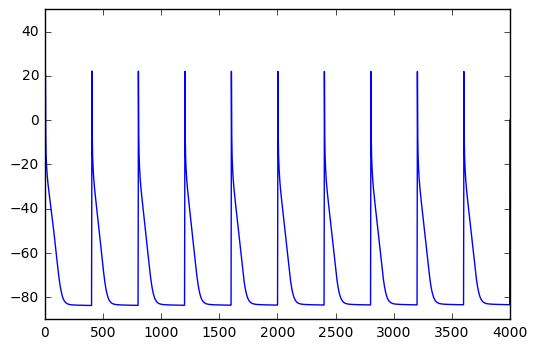

In [63]:
import h5py
input_file = "./test/courtmanche/400pacing_ilca*0.5_ikur*3.0_amp-20/out.h5"
with h5py.File(input_file,"r") as h5file:

    start=0
    dur=4000
    

    v=np.zeros(dur)
    for i in range(1,dur-1):
        a  = h5file["{0:0>5}/v".format(i+start)].value 
        #ti = np.arange(0,100.,1)
        #ax_v.plot(ti,v,'o')
        plt.xlim([0,4000])
        plt.ylim([-90,50])
        v[i]=a

    time=np.arange(0,dur,1)
    plt.plot(time,v)
    plt.show()


In [35]:
data = v
data.shape

(4000,)

In [36]:
print('x',np.arange(len(data)))
print('v',np.asarray(data))

('x', array([   0,    1,    2, ..., 3997, 3998, 3999]))
('v', array([  0.        , -81.45825042, -61.80914277, ..., -83.33961919,
       -83.3404544 ,   0.        ]))


In [37]:
APD=np.zeros_like(data)
is_active=1

In [38]:
maxtab = []
mintab = []
x = np.arange(len(data))
v = np.asarray(data)
mn, mx = np.Inf, -np.Inf
mnpos, mxpos = np.NaN, np.NaN
lookformax = True
for k in np.arange(len(v)):
    this = v[k]
    if this > mx:
        mx = this
        mxpos = x[k]
    if this < mn:
        mn = this
        mnpos = x[k]
    if lookformax:
        if this < mx-0.1:   ##mx-OO で検知する厳しさを設定
            maxtab.append((mxpos, mx))
            mn = this
            mnpos = x[k]
            lookformax = False
    else :
        if this > mn+0.1:
            mintab.append((mnpos, mn))
            mx = this
            mxpos = x[k]
            lookformax = True
maxtab = np.array(maxtab)
mintab = np.array(mintab)
if maxtab[0, 0] <= mintab[0,0]:

    APD_start = maxtab[1,0]
else:
    APD_start = maxtab[0, 0]        
if maxtab[-1, 0] >= mintab[-1, 0]:
    APD_end = mintab[-2, 0]
else:
    APD_end = mintab[-1, 0]
x_range = np.arange(int(APD_start),int(APD_end), 1)
max_y = np.mean(maxtab, axis=0)[1]
min_y = np.mean(mintab, axis=0)[1]
APD_50 = min_y + (max_y - min_y) * 0.5
APD_90 = min_y + (max_y - min_y) * 0.1
for k in range(x_range[0], x_range[-1]-1):
    start_time =list(filter(lambda x:x<=k, maxtab[:, 0]))[-1]
    if is_active:
        if data[k] >= APD_90 and data[k+1] < APD_90:
            APD_value = k - start_time
            is_active = 0
        else:
            APD_value = 0
    else:
        if data[k] <= APD_50 and data[k+1] > APD_50:
            APD_value=0
            is_active = 1
        else:
            APD_value=0
    APD[k] = APD_value  

In [31]:
print(APD[APD!=0].mean())
#4

111.222222222


In [32]:
print(APD[APD!=0].std())

3.48895965958


In [13]:
APD[500:1000]

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,  111.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

In [39]:
print(APD[APD!=0].mean())
#0.1

111.222222222


In [40]:
print(APD[APD!=0].std())

3.48895965958


In [41]:
print(np.count_nonzero(APD != 0))

9


In [44]:
print(APD[APD!=0])

[ 121.  111.  110.  109.  110.  110.  110.  110.  110.]


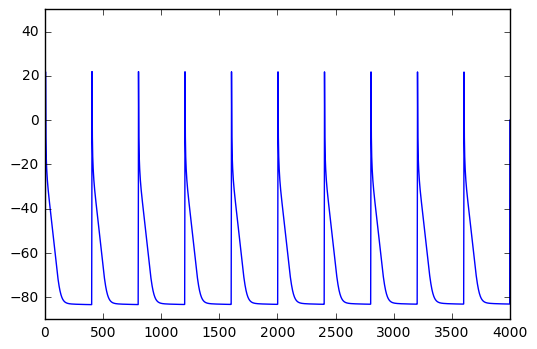

In [50]:
import h5py
input_file = "./test/courtmanche/400pacing_ilca*0.5_ikur*3.0_amp-20_restart/out.h5"
with h5py.File(input_file,"r") as h5file:

    start=0
    dur=4000
    

    v=np.zeros(dur)
    for i in range(1,dur-1):
        a  = h5file["{0:0>5}/v".format(i+start)].value 
        #ti = np.arange(0,100.,1)
        #ax_v.plot(ti,v,'o')
        plt.xlim([0,4000])
        plt.ylim([-90,50])
        v[i]=a

    time=np.arange(0,dur,1)
    plt.plot(time,v)
    plt.show()


In [51]:
data = v
data.shape

(4000,)

In [52]:
APD=np.zeros_like(data)
is_active=1

In [53]:
maxtab = []
mintab = []
x = np.arange(len(data))
v = np.asarray(data)
mn, mx = np.Inf, -np.Inf
mnpos, mxpos = np.NaN, np.NaN
lookformax = True
for k in np.arange(len(v)):
    this = v[k]
    if this > mx:
        mx = this
        mxpos = x[k]
    if this < mn:
        mn = this
        mnpos = x[k]
    if lookformax:
        if this < mx-0.1:   ##mx-OO で検知する厳しさを設定
            maxtab.append((mxpos, mx))
            mn = this
            mnpos = x[k]
            lookformax = False
    else :
        if this > mn+0.1:
            mintab.append((mnpos, mn))
            mx = this
            mxpos = x[k]
            lookformax = True
maxtab = np.array(maxtab)
mintab = np.array(mintab)
if maxtab[0, 0] <= mintab[0,0]:

    APD_start = maxtab[1,0]
else:
    APD_start = maxtab[0, 0]        
if maxtab[-1, 0] <= mintab[-1, 0]:
    APD_end = mintab[-2, 0]
else:
    APD_end = mintab[-1, 0]
x_range = np.arange(int(APD_start),int(APD_end), 1)
max_y = np.mean(maxtab, axis=0)[1]
min_y = np.mean(mintab, axis=0)[1]
APD_50 = min_y + (max_y - min_y) * 0.5
APD_90 = min_y + (max_y - min_y) * 0.1
for k in range(x_range[0], x_range[-1]-1):
    start_time =list(filter(lambda x:x<=k, maxtab[:, 0]))[-1]
    if is_active:
        if data[k] >= APD_90 and data[k+1] < APD_90:
            APD_value = k - start_time
            is_active = 0
        else:
            APD_value = 0
    else:
        if data[k] <= APD_50 and data[k+1] > APD_50:
            APD_value=0
            is_active = 1
        else:
            APD_value=0
    APD[k] = APD_value  

In [54]:
print(APD[APD!=0].mean())
#0.1

110.888888889


In [55]:
print(APD[APD!=0].std())

0.566557723733


In [56]:
print(APD[APD!=0])

[ 110.  110.  111.  111.  111.  111.  111.  111.  112.]


## master 
## 400pacing 20発印加後，10発分のAPD90平均 ．リスタートは30発印加後
## APD90 111.7 ± 0.45 ms(n=10拍) 

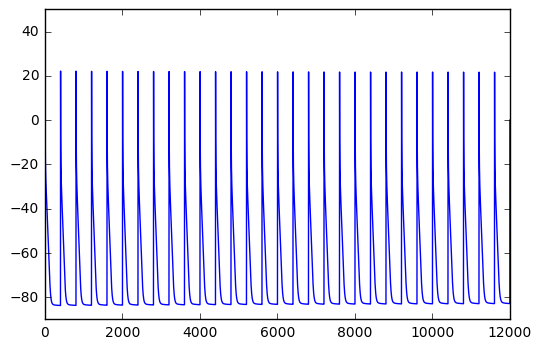

In [96]:
import h5py
input_file = "./test/courtmanche/400pacing_ilca*0.5_ikur*3.0_amp-20_master/out.h5"
with h5py.File(input_file,"r") as h5file:

    start=0
    dur=12000
    

    v=np.zeros(dur)
    for i in range(1,dur-1):
        a  = h5file["{0:0>5}/v".format(i+start)].value 
        #ti = np.arange(0,100.,1)
        #ax_v.plot(ti,v,'o')
        plt.xlim([0,12000])
        plt.ylim([-90,50])
        v[i]=a

    time=np.arange(0,dur,1)
    plt.plot(time,v)
    plt.show()


In [97]:
data = v
APD=np.zeros_like(data)
is_active=1

In [98]:
maxtab = []
mintab = []
x = np.arange(len(data))
v = np.asarray(data)
mn, mx = np.Inf, -np.Inf
mnpos, mxpos = np.NaN, np.NaN
lookformax = True
for k in np.arange(len(v)):
    this = v[k]
    if this > mx:
        mx = this
        mxpos = x[k]
    if this < mn:
        mn = this
        mnpos = x[k]
    if lookformax:
        if this < mx-0.1:   ##mx-OO で検知する厳しさを設定
            maxtab.append((mxpos, mx))
            mn = this
            mnpos = x[k]
            lookformax = False
    else :
        if this > mn+0.1:
            mintab.append((mnpos, mn))
            mx = this
            mxpos = x[k]
            lookformax = True
maxtab = np.array(maxtab)
mintab = np.array(mintab)
if maxtab[0, 0] <= mintab[0,0]:

    APD_start = maxtab[1,0]
else:
    APD_start = maxtab[0, 0]        
if maxtab[-1, 0] >= mintab[-1, 0]:
    APD_end = mintab[-2, 0]
else:
    APD_end = mintab[-1, 0]
x_range = np.arange(int(APD_start),int(APD_end), 1)
max_y = np.mean(maxtab, axis=0)[1]
min_y = np.mean(mintab, axis=0)[1]
APD_50 = min_y + (max_y - min_y) * 0.5
APD_90 = min_y + (max_y - min_y) * 0.1
for k in range(x_range[0], x_range[-1]-1):
    start_time =list(filter(lambda x:x<=k, maxtab[:, 0]))[-1]
    if is_active:
        if data[k] >= APD_90 and data[k+1] < APD_90:
            APD_value = k - start_time
            is_active = 0
        else:
            APD_value = 0
    else:
        if data[k] <= APD_50 and data[k+1] > APD_50:
            APD_value=0
            is_active = 1
        else:
            APD_value=0
    APD[k] = APD_value  

In [101]:
print(APD_start)
print(APD_end)

4.0
11998.0


In [102]:
#30拍のAPD
print(APD[APD!=0])

[ 120.  110.  109.  109.  109.  109.  109.  109.  109.  110.  110.  110.
  110.  110.  110.  111.  111.  111.  111.  111.  111.  111.  112.  112.
  112.  112.  112.  112.  112.  112.]


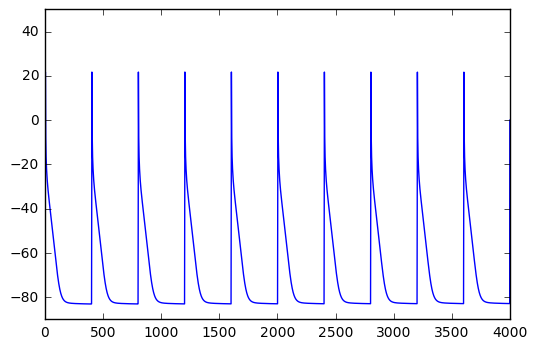

In [107]:
import h5py
input_file = "./test/courtmanche/400pacing_ilca*0.5_ikur*3.0_amp-20_master/out.h5"
with h5py.File(input_file,"r") as h5file:

    start=8000
    dur=4000
    

    v=np.zeros(dur)
    for i in range(1,dur-1):
        a  = h5file["{0:0>5}/v".format(i+start)].value 
        #ti = np.arange(0,100.,1)
        #ax_v.plot(ti,v,'o')
        plt.xlim([0,4000])
        plt.ylim([-90,50])
        v[i]=a

    time=np.arange(0,dur,1)
    plt.plot(time,v)
    plt.show()


In [108]:
data = v
APD=np.zeros_like(data)
is_active=1

In [109]:
maxtab = []
mintab = []
x = np.arange(len(data))
v = np.asarray(data)
mn, mx = np.Inf, -np.Inf
mnpos, mxpos = np.NaN, np.NaN
lookformax = True
for k in np.arange(len(v)):
    this = v[k]
    if this > mx:
        mx = this
        mxpos = x[k]
    if this < mn:
        mn = this
        mnpos = x[k]
    if lookformax:
        if this < mx-0.1:   ##mx-OO で検知する厳しさを設定
            maxtab.append((mxpos, mx))
            mn = this
            mnpos = x[k]
            lookformax = False
    else :
        if this > mn+0.1:
            mintab.append((mnpos, mn))
            mx = this
            mxpos = x[k]
            lookformax = True
maxtab = np.array(maxtab)
mintab = np.array(mintab)
if maxtab[0, 0] <= mintab[0,0]:

    APD_start = maxtab[1,0]
else:
    APD_start = maxtab[0, 0]        
if maxtab[-1, 0] >= mintab[-1, 0]:
    APD_end = mintab[-2, 0]
else:
    APD_end = mintab[-1, 0]
x_range = np.arange(int(APD_start),int(APD_end), 1)
max_y = np.mean(maxtab, axis=0)[1]
min_y = np.mean(mintab, axis=0)[1]
APD_50 = min_y + (max_y - min_y) * 0.5
APD_90 = min_y + (max_y - min_y) * 0.1
for k in range(x_range[0], x_range[-1]-1):
    start_time =list(filter(lambda x:x<=k, maxtab[:, 0]))[-1]
    if is_active:
        if data[k] >= APD_90 and data[k+1] < APD_90:
            APD_value = k - start_time
            is_active = 0
        else:
            APD_value = 0
    else:
        if data[k] <= APD_50 and data[k+1] > APD_50:
            APD_value=0
            is_active = 1
        else:
            APD_value=0
    APD[k] = APD_value  

In [110]:
#ラスト10拍のAPD
print(APD[APD!=0])

[ 111.  111.  111.  112.  112.  112.  112.  112.  112.  112.]


In [112]:
print(APD[APD!=0].mean())
print(APD[APD!=0].std())

111.7
0.458257569496


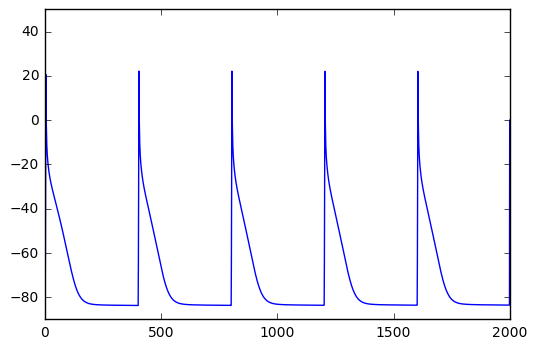

In [5]:
import h5py
input_file = "/mnt/Share/Temp/kato/celltest_results/courtmanche/400pacing_ilca*0.5_ikur*3.0_amp-20_master/out.h5"
with h5py.File(input_file,"r") as h5file:

    start=0
    dur=2000
    

    v=np.zeros(dur)
    for i in range(1,dur-1):
        a  = h5file["{0:0>5}/v".format(i+start)].value 
        #ti = np.arange(0,100.,1)
        #ax_v.plot(ti,v,'o')
        plt.xlim([0,2000])
        plt.ylim([-90,50])
        v[i]=a

    time=np.arange(0,dur,1)
    plt.plot(time,v)
    plt.show()


In [7]:
data = v
APD=np.zeros_like(data)
is_active=1

In [8]:

maxtab = []
mintab = []
starttab=[]
endtab=[]

x = np.arange(len(data[:]))
v = np.asarray(data[:])
mn, mx = np.Inf, -np.Inf
mnpos, mxpos = np.NaN, np.NaN
lookformax = True
for k in np.arange(len(v)):
    this = v[k]
    if this > mx:
        mx = this
        mxpos = x[k]
    if this < mn:
        mn = this
        mnpos = x[k]
    if lookformax:
        if this < mx-0.1:   ##mx-OO で検知する厳しさを設定
            maxtab.append((mxpos, mx))
            mn = this
            mnpos = x[k]
            lookformax = False
    else :
        if this > mn+0.1:
            mintab.append((mnpos, mn))
            mx = this
            mxpos = x[k]
            lookformax = True
maxtab = np.array(maxtab)
mintab = np.array(mintab)
if maxtab[0, 0] <= mintab[0,0]:

    APD_start = maxtab[1,0]
else:
    APD_start = maxtab[0, 0]        
if maxtab[-1, 0] >= mintab[-1, 0]:
    APD_end = mintab[-2, 0]
else:
    APD_end = mintab[-1, 0]
x_range = np.arange(int(APD_start),int(APD_end), 1)
max_y = np.mean(maxtab, axis=0)[1]
min_y = np.mean(mintab, axis=0)[1]
APD_50 = min_y + (max_y - min_y) * 0.5
APD_90 = min_y + (max_y - min_y) * 0.1
for k in range(x_range[0], x_range[-1]-1):
    start_time =list(filter(lambda x:x<=k, maxtab[:, 0]))[-1]
    if is_active:
        if data[k] >= APD_90 and data[k+1] < APD_90:
            APD_value = k - start_time
            starttab.append(start_time)
            endtab.append(k)
            is_active = 0
        else:
            APD_value = 0
    else:
        if data[k] <= APD_50 and data[k+1] > APD_50:
            APD_value=0
            is_active = 1
        else:
            APD_value=0
    APD[k] = APD_value  

In [12]:
mintab

array([[  1.00000000e+00,  -8.14582504e+01],
       [  4.01000000e+02,  -8.36884602e+01],
       [  8.01000000e+02,  -8.36437421e+01],
       [  1.20000000e+03,  -8.36026616e+01],
       [  1.60000000e+03,  -8.35628298e+01],
       [  1.99800000e+03,  -8.35221083e+01]])

In [13]:
maxtab

array([[    0.        ,     0.        ],
       [    4.        ,    20.6340314 ],
       [  404.        ,    22.16587808],
       [  804.        ,    22.12690169],
       [ 1204.        ,    22.05417493],
       [ 1604.        ,    22.03564152]])

In [15]:
print(data[0:15])

[  0.         -81.45825042 -61.80914277 -12.54600798  20.6340314
   7.58125035  -1.85610728  -7.57294546 -11.19646336 -13.69474069
 -15.56989135 -17.08047258 -18.36211174 -19.48824932 -20.50054049]


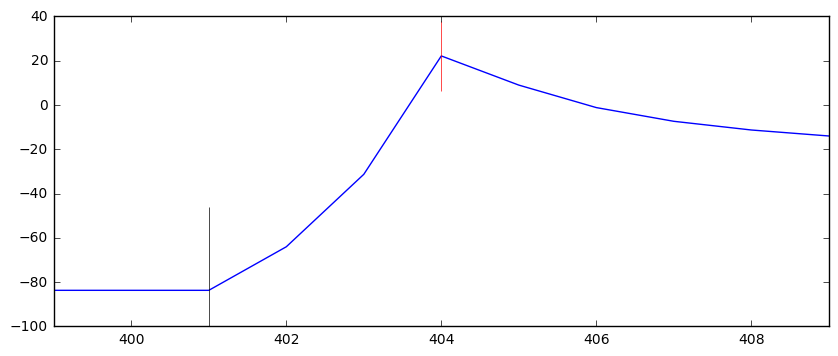

In [14]:
fig = plt.figure(figsize=(10,4))
time=np.arange(0,2000,1)
plt.plot(time,v) 
plt.xlim([399,409])
[plt.plot(point[0],point[1],marker='|',color = 'red',markersize=50) for point in maxtab]
[plt.plot(point[0],point[1],marker='|',color = 'black',markersize=120) for point in mintab]
plt.plot(APD_start,0,marker='.',color='red',markersize=10)
plt.plot(APD_end,0,marker='.',color='black',markersize=10)
x_coodinates = np.arange(starttab[0],endtab[0], 0.01)
y_coodinates = np.ones_like(x_coodinates)*(APD_90)


plt.plot(x_coodinates, y_coodinates, color="Black")

In [19]:
maxtab = []
mintab = []
starttab=[]
endtab=[]

x = np.arange(len(data[:]))
v = np.asarray(data[:])
mn, mx = np.Inf, -np.Inf
mnpos, mxpos = np.NaN, np.NaN
lookformax = True
for k in np.arange(len(v)):
    this = v[k]
    if this > mx:
        mx = this
        mxpos = x[k]
    if this < mn:
        mn = this
        mnpos = x[k]
    if lookformax:
        if this < mx-10:   ##mx-OO で検知する厳しさを設定
            maxtab.append((mxpos, mx))
            mn = this
            mnpos = x[k]
            lookformax = False
    else :
        if this > mn+10:
            mintab.append((mnpos, mn))
            mx = this
            mxpos = x[k]
            lookformax = True
maxtab = np.array(maxtab)
mintab = np.array(mintab)
if maxtab[0, 0] <= mintab[0,0]:

    APD_start = maxtab[1,0]
else:
    APD_start = maxtab[0, 0]        
if maxtab[-1, 0] >= mintab[-1, 0]:
    APD_end = mintab[-2, 0]
else:
    APD_end = mintab[-1, 0]
x_range = np.arange(int(APD_start),int(APD_end), 1)
max_y = np.mean(maxtab, axis=0)[1]
min_y = np.mean(mintab, axis=0)[1]
APD_50 = min_y + (max_y - min_y) * 0.5
APD_90 = min_y + (max_y - min_y) * 0.1

In [20]:
print(maxtab)
print(mintab)

[[    0.             0.        ]
 [    4.            20.6340314 ]
 [  404.            22.16587808]
 [  804.            22.12690169]
 [ 1204.            22.05417493]
 [ 1604.            22.03564152]]
[[  1.00000000e+00  -8.14582504e+01]
 [  4.01000000e+02  -8.36884602e+01]
 [  8.01000000e+02  -8.36437421e+01]
 [  1.20000000e+03  -8.36026616e+01]
 [  1.60000000e+03  -8.35628298e+01]
 [  1.99800000e+03  -8.35221083e+01]]
